In [ ]:
#import nessesary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("C:\\Users\\megha\\OneDrive\\Desktop\\ml projects\\Invistico_Airline - Invistico_Airline.csv")

In [ ]:
#view the data
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.shape

(129880, 23)

In [ ]:
df.size

2987240

In [ ]:
null=pd.isnull(df)
null.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Define age bins
bins = [18, 25, 35, 45, float('inf')]
labels = ['18-25', '26-35', '36-45', '46+']

In [ ]:
# Bin the age column and create a new 'AgeGroup' column in the DataFrame
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

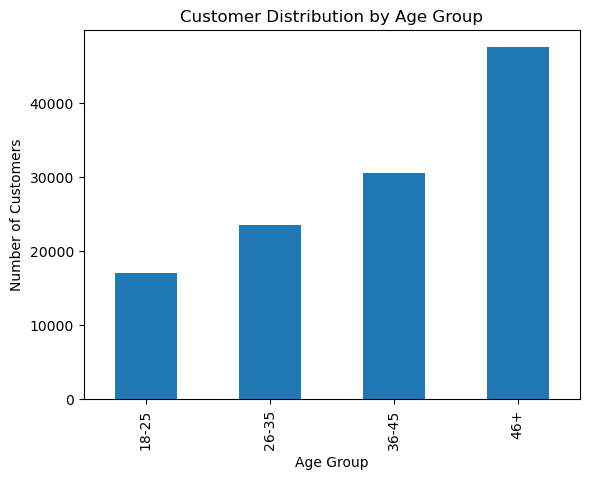

In [ ]:
#Plot age group distribution
age_distribution = df['AgeGroup'].value_counts().sort_index()
age_distribution.plot(kind='bar')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Convert 'Gender' to numerical values
df['GenderNum'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
#Convert 'RepeatPurchase' to numerical values
#Verify the column name is correct and exists in the DataFrame
print(df.columns) # Print all column names to check if 'RepeatPurchase' is present

# Check if 'Repeat Purchase' exists, if not, try a different name or fix data import
if 'RepeatPurchase' in df.columns:
    df['RepeatPurchaseNum'] = df['RepeatPurchase'].map({'No': 0, 'Yes': 1})
elif 'Repeat Purchase' in df.columns:  # Example of a potential alternative name
    print("Found column 'Repeat Purchase' instead of 'RepeatPurchase'")
    df['RepeatPurchaseNum'] = df['Repeat Purchase'].map({'No': 0, 'Yes': 1})
else:
    print("Neither 'RepeatPurchase' nor 'Repeat Purchase' column found. Check your data.")

# Also verify that 'df' is the correct variable name for the dataframe
print(df[['Gender', 'GenderNum']].head()) # Adjust columns if needed

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'AgeGroup',
       'GenderNum'],
      dtype='object')
Neither 'RepeatPurchase' nor 'Repeat Purchase' column found. Check your data.
   Gender  GenderNum
0  Female          1
1    Male          0
2  Female          1
3  Female          1
4  Female          1


In [ ]:
import seaborn as sns

In [ ]:
# Convert 'satisfaction' to numerical values
satisfaction_mapping = {'satisfied': 1, 'neutral': 0, 'dissatisfied': -1}
df['satisfaction'] = df['satisfaction'].map(satisfaction_mapping)

# Ensure 'Age' is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Calculate the covariance matrix
covariance_matrix = df[['Age', 'satisfaction']].cov()

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                     Age  satisfaction
Age           228.595045      1.775650
satisfaction    1.775650      0.991048


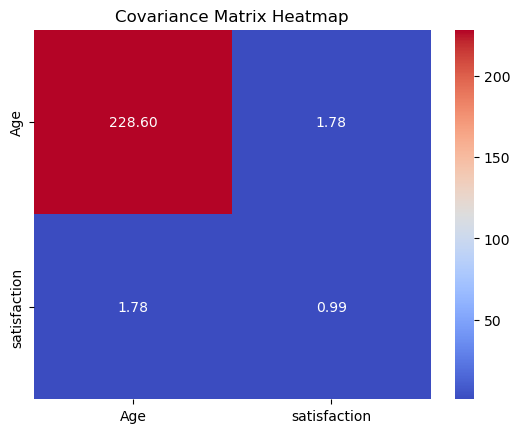

In [ ]:
# Create a heatmap
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.title('Covariance Matrix Heatmap')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency


In [ ]:
#Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Class'])


In [ ]:
# Perform Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency_table)


In [ ]:
print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')


Chi-Square Statistic: 20.90829951817473
p-value: 2.8828393845484897e-05


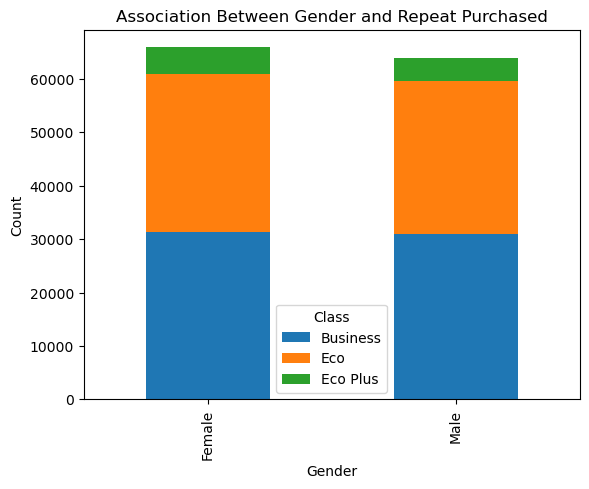

In [ ]:
#Visualize the association using a stacked bar plot
contingency_table.plot(kind='bar', stacked=True)
plt.title('Association Between Gender and Repeat Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Separate data by gender
male_ratings = df[df['Gender'] == 'Male']['satisfaction']
female_ratings = df[df['Gender'] == 'Female']['satisfaction']


In [ ]:
#Perform independent t-test
t_stat, p_value = ttest_ind(male_ratings, female_ratings)

print(f't-Statistic: {t_stat}')
print(f'p-value: {p_value}')

t-Statistic: -78.26996760300251
p-value: 0.0
